# Modeling: Bag of Words Regression Model
### *Claps as Target*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

#modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [30]:
#nltk.download('stopwords')

In [1]:
filename = '../data/nlp_nltk_stemmed_preproc.csv'

#### Look at Word Frequency in the Corpus

In [4]:
df = pd.read_csv(filename).drop(columns = 'Unnamed: 0')

In [5]:
df.head()

,claps,text
0,489,ultim guid ace code interview data scientist d...
1,139,shakespear versu eminem— who’ better lyricist ...
2,133,implement visualttransform pytorch hi guy happ...
3,92,stock price analysi panda altair practic guid ...
4,58,optim threshold imbalanc classif handson tutor...


In [6]:
X = df['text']
y = df['claps']

In [7]:
cvec = CountVectorizer(ngram_range=(1,2), max_features=10_000)


In [8]:
# convert training data to dataframe
X_cvec = pd.DataFrame(cvec.fit_transform(X).todense(),
                         columns=cvec.get_feature_names())

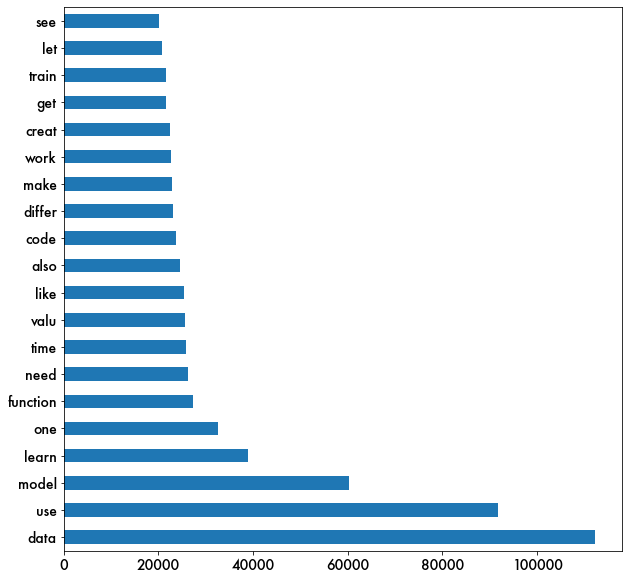

In [9]:
# plot top occurring words/phrases
plt.figure(figsize = (10,10))
X_cvec.sum().sort_values(ascending = False).head(20).plot(kind='barh');
figurefont = {'fontname' : 'Futura'}
plt.xticks(**figurefont, fontsize = 14);
plt.yticks(**figurefont, fontsize = 14);
#plt.savefig('figures/top_occurring_stemmed.jpg',  bbox_inches = "tight")

In [10]:
tvec = TfidfVectorizer(ngram_range=(1,2), max_features=10_000)


In [11]:
# convert training data to dataframe
X_tvec = pd.DataFrame(tvec.fit_transform(X).todense(),
                         columns=tvec.get_feature_names())

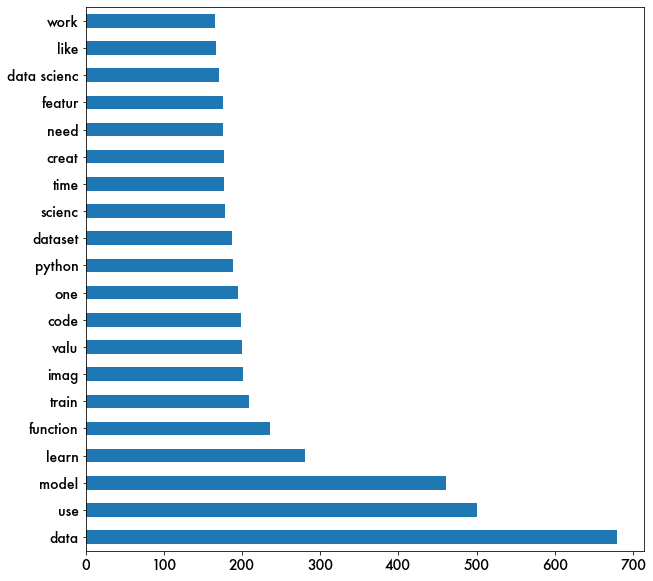

In [12]:
# plot top occurring words/phrases
plt.figure(figsize = (10,10))
X_tvec.sum().sort_values(ascending = False).head(20).plot(kind='barh');
figurefont = {'fontname' : 'Futura'}
plt.xticks(**figurefont, fontsize = 14);
plt.yticks(**figurefont, fontsize = 14);
#plt.savefig('figures/top_occurring_stemmed.jpg',  bbox_inches = "tight")

In [13]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 random_state=42)

#### Count Vectorizer

In [14]:
cvec = CountVectorizer(min_df=5, max_df=.98, ngram_range=(1,2))

In [15]:
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [16]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train_cvec, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train_cvec, y_train)
    results_dict['test_score'] = model.score(X_test_cvec, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train_cvec, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train_cvec)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test_cvec))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [17]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),1.000000,-0.313159,-0.310133,0.001589,128.754898
1,DecisionTreeRegressor(),1.000000,-0.612921,-0.713422,0.000000,142.695972
2,BaggingRegressor(),0.837453,0.020675,0.039774,47.167180,111.190714
3,RandomForestRegressor(),0.876023,0.115549,0.114596,41.192795,105.667671
4,AdaBoostRegressor(),-1.999268,-2.185483,-1.457547,202.608606,200.536198


#### TfidfVectorizer

In [18]:
tvec = TfidfVectorizer(min_df=5, max_df=.98, ngram_range=(1,2))

In [19]:
X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [20]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR()
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train_tvec, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train_tvec, y_train)
    results_dict['test_score'] = model.score(X_test_tvec, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train_tvec, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train_tvec)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test_tvec))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [21]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),1.000000,-0.021191,0.023344,0.000095,113.542560
1,DecisionTreeRegressor(),1.000000,-0.768882,-0.732563,0.000000,149.435751
2,BaggingRegressor(),0.836580,0.006199,0.034071,47.293642,112.009500
3,RandomForestRegressor(),0.880205,0.096960,0.119299,40.492060,106.772306
4,AdaBoostRegressor(),-1.412360,-1.550709,-1.499549,181.706857,179.446757
5,SVR(),-0.094735,-0.114758,-0.106192,122.406595,118.630264


#### Sentiment Analysis

In [22]:
# Instantiate Sentiment Intensity Analyzer
sentiment = SentimentIntensityAnalyzer()

In [31]:
#test
sentiment.polarity_scores(df['text'][8648])

{'neg': 0.083, 'neu': 0.841, 'pos': 0.076, 'compound': 0.8934}

In [24]:
polarity_list = []
for x in df['text']:
    dict_keys =  sentiment.polarity_scores(x).keys()
    dict_values = sentiment.polarity_scores(x).values()
    polarity_dict = dict(zip(dict_keys,dict_values))
    polarity_list.append(polarity_dict)

In [25]:
polarity_df = pd.DataFrame(polarity_list)

In [26]:
polarity_df.value_counts()

neg    neu    pos    compound
0.060  0.940  0.000  -0.1531     16
0.056  0.944  0.000  -0.1531     11
0.058  0.942  0.000  -0.1531     10
0.054  0.946  0.000  -0.1531     10
0.062  0.938  0.000  -0.1531     10
                                 ..
0.017  0.896  0.087   0.9906      1
                      0.9869      1
                      0.9814      1
       0.895  0.089   0.9947      1
0.264  0.629  0.108  -0.9962      1
Length: 9208, dtype: int64

In [42]:
# Add the target variable to the sentiment polarity df
polarity_df['claps'] = df['claps']

In [36]:
polarity_df

,neg,neu,pos,compound,claps
0,0.043,0.848,0.109,0.9957,489
1,0.040,0.833,0.127,0.9985,139
2,0.029,0.879,0.092,0.9869,133
3,0.024,0.950,0.027,0.3400,92
4,0.044,0.892,0.064,0.9719,58
...,...,...,...,...,...
9285,0.011,0.838,0.151,0.9988,4
9286,0.018,0.945,0.037,0.6486,1
9287,0.031,0.872,0.096,0.9928,7
9288,0.035,0.915,0.051,0.7845,9


In [38]:
X = polarity_df.drop(columns = 'claps')
y = polarity_df['claps']

In [39]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 random_state=42)

In [40]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR()
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train, y_train)
    results_dict['test_score'] = model.score(X_test, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [41]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),0.008211,0.008779,0.006521,116.509094,111.864029
1,DecisionTreeRegressor(),0.998288,-1.191140,-1.105470,4.840656,166.318352
2,BaggingRegressor(),0.791449,-0.207262,-0.198818,53.426436,123.454195
3,RandomForestRegressor(),0.840789,-0.114417,-0.115726,46.680586,118.612123
4,AdaBoostRegressor(),-0.092771,-0.106295,-0.226817,122.296747,118.179108
5,SVR(),-0.109307,-0.118802,-0.110149,123.218580,118.845243
